In [12]:
from bs4 import BeautifulSoup
import pandas as pd

In [13]:
import requests

In [14]:
density_response=requests.get("https://visaguide.world/asia/")

In [15]:
density_response.status_code

200

In [16]:
density_response.text

'<!DOCTYPE html>\n<html lang="en-US">\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n\t<link rel="profile" href="https://gmpg.org/xfn/11"> \n\t<meta name=\'robots\' content=\'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1\' />\n\t<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>\n\t\n\t<!-- This site is optimized with the Yoast SEO plugin v24.2 - https://yoast.com/wordpress/plugins/seo/ -->\n\t<title>List of Countries in Asia - VisaGuide.World</title><link rel="preload" data-rocket-preload as="image" href="https://visaguide.world/wp-content/uploads/2023/01/Visa-Guide-World.svg" fetchpriority="high"><link rel="preload" data-rocket-preload as="style" href="https://fonts.googleapis.com/css?family=Roboto%3A300%2C400%2C500&#038;display=swap" /><link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Roboto%3A300%2C400%2C500&#038;display=swap" 

In [17]:
type(density_response.text)

str

In [18]:
densitysoup= BeautifulSoup(density_response.text,"html.parser")

In [19]:
type(densitysoup)

bs4.BeautifulSoup

In [20]:
densitytables=densitysoup.find_all("table")

In [21]:
len(densitytables)

3

In [26]:
densityheaders_tag=densitytables[1].find_all("th")
print(densityheaders_tag)

[<th>Country</th>, <th>Capital</th>, <th>Area km2</th>, <th>Population (2021)</th>]


In [27]:
densityheaders=[i.text for i in densityheaders_tag]
print(densityheaders)

['Country', 'Capital', 'Area km2', 'Population (2021)']


In [30]:
densityrows_tag=densitytables[1].find_all("td")
densityrows_tag

[<td>Afghanistan</td>,
 <td>Kabul</td>,
 <td>652,864</td>,
 <td>39,835,428</td>,
 <td>Armenia</td>,
 <td>Yerevan</td>,
 <td>29,743</td>,
 <td>2,968,127</td>,
 <td>Azerbaijan</td>,
 <td>Baku</td>,
 <td>86,600</td>,
 <td>10,223,342</td>,
 <td>Bahrain</td>,
 <td>Manama</td>,
 <td>760</td>,
 <td>1,748,296</td>,
 <td>Bangladesh</td>,
 <td>Dhaka</td>,
 <td>147,570</td>,
 <td>166,303,498</td>,
 <td>Bhutan</td>,
 <td>Thimphu</td>,
 <td>38,394</td>,
 <td>779,898</td>,
 <td>Brunei</td>,
 <td>Bandar Seri Begawan</td>,
 <td>5,765</td>,
 <td>441,532</td>,
 <td>Cambodia</td>,
 <td>Phnom Penh</td>,
 <td>181,035</td>,
 <td>16,946,438</td>,
 <td>China (PRC)</td>,
 <td>Beijing</td>,
 <td>9,596,961</td>,
 <td>1,444,216,107</td>,
 <td>East Timor</td>,
 <td>Dili</td>,
 <td>14,874</td>,
 <td>1,343,873</td>,
 <td>Georgia</td>,
 <td>Tbilisi</td>,
 <td>69,700</td>,
 <td>3,979,765</td>,
 <td>Hong Kong</td>,
 <td>City of Victoria</td>,
 <td>2,755</td>,
 <td>7,552,810</td>,
 <td>India</td>,
 <td>New Delhi</td>,
 

In [31]:
densityrows=[i.text for i in densityrows_tag]
densityrows

['Afghanistan',
 'Kabul',
 '652,864',
 '39,835,428',
 'Armenia',
 'Yerevan',
 '29,743',
 '2,968,127',
 'Azerbaijan',
 'Baku',
 '86,600',
 '10,223,342',
 'Bahrain',
 'Manama',
 '760',
 '1,748,296',
 'Bangladesh',
 'Dhaka',
 '147,570',
 '166,303,498',
 'Bhutan',
 'Thimphu',
 '38,394',
 '779,898',
 'Brunei',
 'Bandar Seri Begawan',
 '5,765',
 '441,532',
 'Cambodia',
 'Phnom Penh',
 '181,035',
 '16,946,438',
 'China (PRC)',
 'Beijing',
 '9,596,961',
 '1,444,216,107',
 'East Timor',
 'Dili',
 '14,874',
 '1,343,873',
 'Georgia',
 'Tbilisi',
 '69,700',
 '3,979,765',
 'Hong Kong',
 'City of Victoria',
 '2,755',
 '7,552,810',
 'India',
 'New Delhi',
 '3,287,263',
 '1,393,409,038',
 'Indonesia',
 'Jakarta',
 '1,904,569',
 '276,361,783',
 'Iran',
 'Tehran',
 '1,648,195',
 '85,028,759',
 'Iraq',
 'Baghdad',
 '438,317',
 '41,179,350',
 'Israel',
 'Jerusalem (disputed)',
 '20,770',
 '8,789,774',
 'Japan',
 'Tokyo',
 '377,915',
 '126,050,804',
 'Jordan',
 'Amman',
 '89,342',
 '10,269,021',
 'Kazakhst

In [34]:
density_dict={}
n=0
for i in densityheaders:
  density_dict[i]= [densityrows[j] for j in range(n,len(densityrows),len(densityheaders))]
  n += 1
density_dict

{'Country': ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'China (PRC)',
  'East Timor',
  'Georgia',
  'Hong Kong',
  'India',
  'Indonesia',
  'Iran',
  'Iraq',
  'Israel',
  'Japan',
  'Jordan',
  'Kazakhstan',
  'Kuwait',
  'Kyrgyzstan',
  'Laos',
  'Lebanon',
  'Macau',
  'Malaysia',
  'Maldives',
  'Mongolia',
  'Myanmar',
  'Nepal',
  'North Korea',
  'Oman',
  'Pakistan',
  'Palestine',
  'Qatar',
  'Russia',
  'Saudi Arabia',
  'Singapore',
  'South Korea',
  'Sri Lanka',
  'Syria',
  'Taiwan',
  'Tajikistan',
  'Thailand',
  'The Philippines',
  'Turkey',
  'Turkmenistan',
  'United Arab Emirates',
  'Uzbekistan',
  'Vietnam',
  'Yemen'],
 'Capital': ['Kabul',
  'Yerevan',
  'Baku',
  'Manama',
  'Dhaka',
  'Thimphu',
  'Bandar Seri Begawan',
  'Phnom Penh',
  'Beijing',
  'Dili',
  'Tbilisi',
  'City of Victoria',
  'New Delhi',
  'Jakarta',
  'Tehran',
  'Baghdad',
  'Jerusalem (disputed)',
  'Tokyo',
  'Am

In [36]:
density_df=pd.DataFrame(density_dict)

In [37]:
density_df

,Country,Capital,Area km2,Population (2021)
0,Afghanistan,Kabul,"652,864","39,835,428"
1,Armenia,Yerevan,"29,743","2,968,127"
2,Azerbaijan,Baku,"86,600","10,223,342"
3,Bahrain,Manama,760,"1,748,296"
4,Bangladesh,Dhaka,"147,570","166,303,498"
5,Bhutan,Thimphu,"38,394","779,898"
6,Brunei,Bandar Seri Begawan,"5,765","441,532"
7,Cambodia,Phnom Penh,"181,035","16,946,438"
8,China (PRC),Beijing,"9,596,961","1,444,216,107"
9,East Timor,Dili,"14,874","1,343,873"


In [39]:
density_df.index=range(1,len(density_df)+1)
density_df

,Country,Capital,Area km2,Population (2021)
1,Afghanistan,Kabul,"652,864","39,835,428"
2,Armenia,Yerevan,"29,743","2,968,127"
3,Azerbaijan,Baku,"86,600","10,223,342"
4,Bahrain,Manama,760,"1,748,296"
5,Bangladesh,Dhaka,"147,570","166,303,498"
6,Bhutan,Thimphu,"38,394","779,898"
7,Brunei,Bandar Seri Begawan,"5,765","441,532"
8,Cambodia,Phnom Penh,"181,035","16,946,438"
9,China (PRC),Beijing,"9,596,961","1,444,216,107"
10,East Timor,Dili,"14,874","1,343,873"


In [42]:
density_df.to_csv("density_data.csv")

In [44]:
density_df["Population (2021)"]=density_df["Population (2021)"].str.replace(",","").astype(int)

In [46]:
density_df["Population_density"]=density_df["Population (2021)"]/density_df['Area km2'].str.replace(",","").astype(int)

In [59]:
density_df_sorted=density_df.sort_values(by="Population_density",ascending=False)
density_df_sorted.head()

,Country,Capital,Area km2,Population (2021),Population_density
38,Singapore,Singapore,697,5896686,8460.094692
25,Macau,Macau,115,658394,5725.165217
12,Hong Kong,City of Victoria,"2,755",7552810,2741.491833
4,Bahrain,Manama,760,1748296,2300.389474
27,Maldives,Malé,298,543617,1824.218121


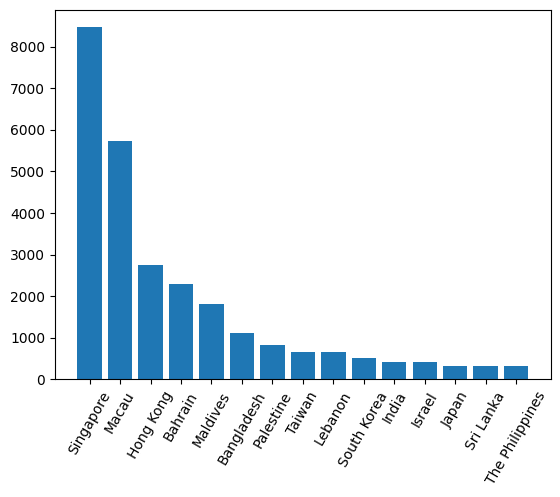

In [60]:
import matplotlib.pyplot as plt
x=density_df_sorted["Country"][:15]
y=density_df_sorted["Population_density"][:15]
plt.xticks(rotation=60)
plt.bar(x,y)
plt.show()